# Car Price Prediction

---

dataset link : https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

This dataset contains information about used cars.
The columns in the given dataset are as follows:
- Name
- year
- Selling Price
- km driven
- fuel
- seller type
- transmission
- Owner

our goal is to predict the selling price of the car.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/car.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# age of the car = current_year - Year

data['Age'] = 2021 - data['Year']

In [7]:
data = data.drop(['Car_Name', 'Year'], axis=1)

In [8]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


# Handling Categorical Data

In [9]:
df = pd.get_dummies(data, drop_first=True)

In [10]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [11]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


## EDA

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

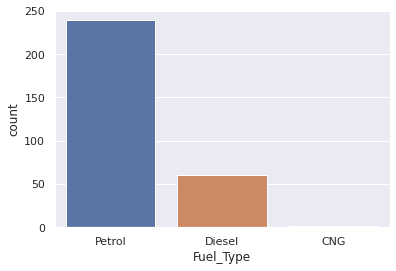

In [12]:
# plot the fuel type column

print(data['Fuel_Type'].value_counts())
sns.countplot(x='Fuel_Type', data=data)

here, around 79% car in our dataset has a fuel type 'Petrol'

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

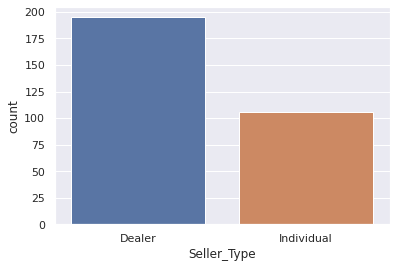

In [13]:
# plot seller type column with countplot

print(data['Seller_Type'].value_counts())
sns.countplot(x='Seller_Type', data=data)

In seller type we have only two categorys 1. Dealer and 2. Individual

Manual       261
Automatic     40
Name: Transmission, dtype: int64


<AxesSubplot:xlabel='Transmission', ylabel='count'>

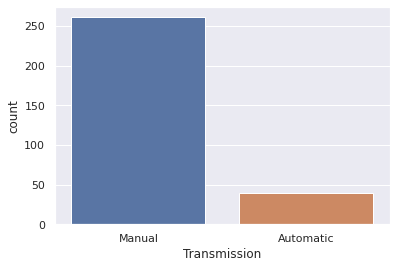

In [14]:
# plot transmission column

print(data['Transmission'].value_counts())
sns.countplot(x='Transmission', data=data)

0    290
1     10
3      1
Name: Owner, dtype: int64


<AxesSubplot:xlabel='Owner', ylabel='count'>

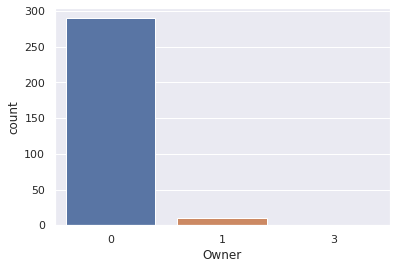

In [15]:
# plot owner column

print(data['Owner'].value_counts())
sns.countplot(x='Owner', data=data)

Here, around 96% cars has 0 owner it means 96% car owner are the first time seller

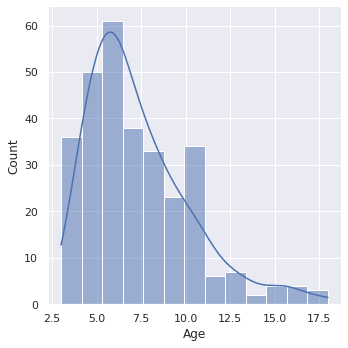

In [16]:
sns.displot(data=data, x='Age', kde=True)

most car age is between 3 to 11 years

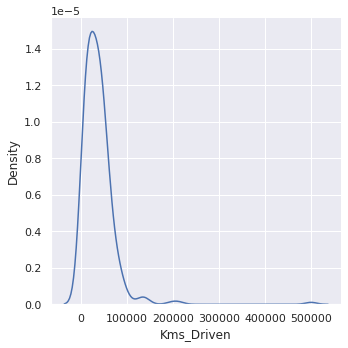

In [17]:
sns.displot(data=data, x='Kms_Driven', kind='kde')

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

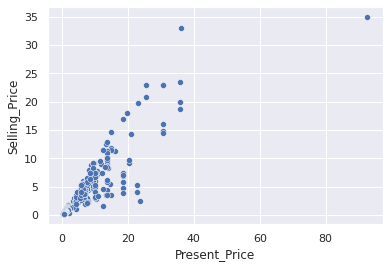

In [18]:
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data)

<AxesSubplot:>

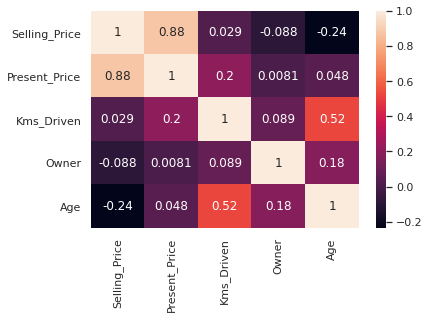

In [19]:
sns.heatmap(data=data.corr(), annot=True)

# Model creation

In [20]:
# selling_price is our target variable

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
y_pred = reg_rf.predict(X_test)

In [24]:
reg_rf.score(X_train, y_train)

0.9878024770871209

In [25]:
reg_rf.score(X_test, y_test)

0.914352806179938

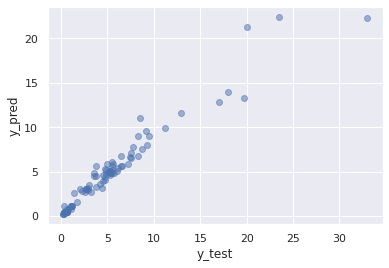

In [26]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.769827472527473
MSE: 2.561369835274724
RMSE: 1.6004280162739979


In [28]:
metrics.r2_score(y_test, y_pred)

0.914352806179938

# Hyperparameter Tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 15, 20, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [30]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, 
                               random_state=42, n_jobs = 1)

In [31]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [33]:
y_pred = rf_random.predict(X_test)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

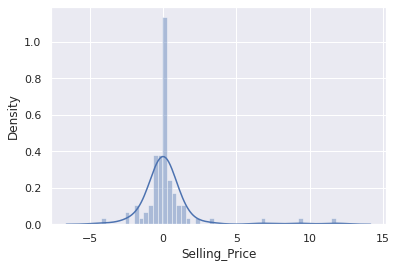

In [34]:
sns.distplot(y_test-y_pred)

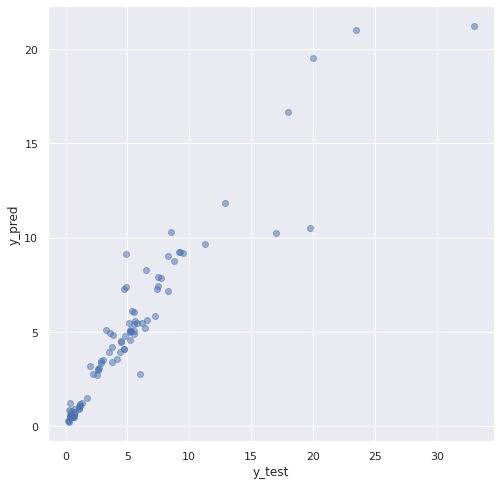

In [36]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.8710241758241746
MSE: 3.85726246887198
RMSE: 1.9639914635435614
